# Loan Data from Prosper
## by (Faisal Almalki)

## Investigation Overview

> Describe the overall goals of your presentation here.The overall gpals of this presentation is we can pridect if the client going to pay the loan in the time or not and also to see what make the Borrower Rate gose up 

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan that means 9228897 cell, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import dates as mpl_dates
from datetime import date


%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# remove columns and columns with empty values that are not useful in the Dateset
dfNew = df.copy()
dfNew.drop(['ListingKey', 'LoanNumber', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', "EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn", 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
           "LP_ServiceFees", "LP_CollectionFees", 'BankcardUtilization', "LP_GrossPrincipalLoss", "LP_NetPrincipalLoss", "IncomeVerifiable", "LP_NonPrincipalRecoverypayments", "PercentFunded", "Recommendations" , "InvestmentFromFriendsCount" ,"InvestmentFromFriendsAmount", "MemberKey", "MonthlyLoanPayment", "LP_CustomerPayments", "LP_CustomerPrincipalPayments", "LP_InterestandFees", "Investors", "LoanOriginationQuarter"], axis=1, inplace = True)

In [5]:
#code 
dfNew.insert (39, "LoanOriginationDateYear", dfNew['LoanOriginationDate'].str[:4])

In [6]:
dfNew.insert (39, "LoanOriginationDateYear1", pd.to_datetime(dfNew['LoanOriginationDateYear'], format='%Y/'))

In [7]:
dfNew.insert (2, "Term_by_year", df.Term / 12)

In [8]:
# convert Term By Year to int than to string

dfNew['Term_by_year'] = dfNew['Term_by_year'].astype(int)
dfNew['Term_by_year'] = dfNew['Term_by_year'].astype(str)

## change it to the following

dfNew.Term_by_year = dfNew['Term_by_year'].map({'3':'3 years',
                             '5':'5 years',
                             '1':'1 year'},
                             na_action=None)

In [9]:
#code
dfNew.LoanStatus = dfNew['LoanStatus'].map({"Completed": "Completed",
                                            "Current": "Current",
                                            "Defaulted": "Defaulted",
                                            "Chargedoff": "Chargedoff",
                                            "Cancelled": "Cancelled",
                                            "FinalPaymentInProgress": "FinalPaymentInProgress",
                                            "Past Due (1-15 days)": "Past Due",
                                            "Past Due (16-30 days)": "Past Due",
                                           "Past Due (31-60 days)": "Past Due",
                                           "Past Due (61-90 days)": "Past Due",
                                           "Past Due (91-120 days)": "Past Due",
                                           "Past Due (>120 days)": "Past Due"},  na_action=None)

In [13]:
dfSort = dfNew.sort_values(by="LoanOriginationDateYear", key=pd.to_datetime)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)



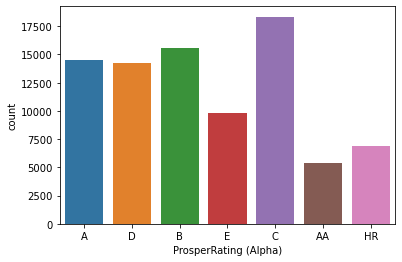

In [10]:
# people prefered to pay there loan in 3 years
sb.countplot(data = dfNew, x = 'ProsperRating (Alpha)');

## loaner grade

  - most of people here in this dataset have C grade 
  - there is around 5000 loaner with grade "AA" and it's the lowest grade in the chart people 
  - the purpose of this chart is to tell us how many loaner are we analyze and

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

Text(0.5, 1.0, 'All the loan')

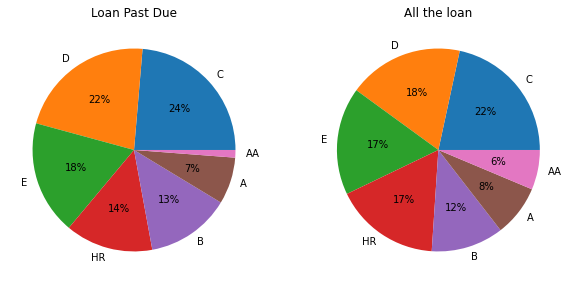

In [11]:
fig, (pltPast,pltNew) = plt.subplots(1,2,figsize=(10,10))


def autopct_more_than_1(pct):
    return ('%1.f%%' % pct) if pct > 2 else ''
# select all the Past Due columns
dfPastDue = dfNew[dfNew["LoanStatus"] == "Past Due"]
#Past Due
df_past_counts = dfPastDue['ProsperRating (Alpha)'].value_counts()

pltPast.pie(df_past_counts, labels = df_past_counts.index, autopct=autopct_more_than_1,);
pltPast.set_title("Loan Past Due")

dfNew_counts = dfNew['ProsperRating (Alpha)'].value_counts()

pltNew.pie(dfNew_counts, labels = df_past_counts.index, autopct=autopct_more_than_1);
pltNew.set_title("All the loan")

## Loan past due! how can we solve this issue?
##### clients with grade "AA" have more potinal to pay the loan in the time, clients with C or less have more potental to be past due, we recommend to work with people how have grade "B" or above, loaner with grade C or less we have to make sure they can complete there loan on the time

## (Visualization 3)



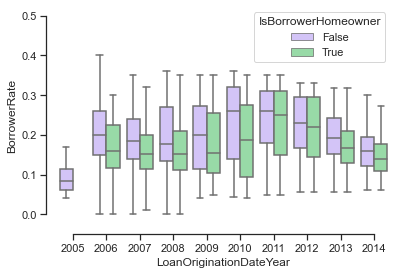

In [14]:
sb.set_theme(style="ticks", palette="pastel")


sb.boxplot(data=dfSort, x="LoanOriginationDateYear", y="BorrowerRate",
            hue="IsBorrowerHomeowner", palette=["m", "g"], fliersize=0)
sb.despine(offset=10, trim=True)

## Borrowers homewoner 

> borrowers who are Homeowner received lower Borrower Rate, borrowers who are NOT Homeowner received higher Borrower Rate. we are not interested in the outliers in this visualization so we hide them.